1) Data Analysis

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ast
import numpy as np

In [13]:
primary_data = pd.read_csv("./primary_data.csv",delimiter=";")
secondary_data = pd.read_csv("./secondary_data.csv",delimiter=";")
primary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   family                173 non-null    object
 1   name                  173 non-null    object
 2   class                 173 non-null    object
 3   cap-diameter          173 non-null    object
 4   cap-shape             173 non-null    object
 5   Cap-surface           133 non-null    object
 6   cap-color             173 non-null    object
 7   does-bruise-or-bleed  173 non-null    object
 8   gill-attachment       145 non-null    object
 9   gill-spacing          102 non-null    object
 10  gill-color            173 non-null    object
 11  stem-height           173 non-null    object
 12  stem-width            173 non-null    object
 13  stem-root             27 non-null     object
 14  stem-surface          65 non-null     object
 15  stem-color            173 non-null    ob

In [14]:
secondary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

In [15]:
secondary_data

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,p,1.18,s,s,y,f,f,f,f,3.93,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61065,p,1.27,f,s,y,f,f,f,f,3.18,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61066,p,1.27,s,s,y,f,f,f,f,3.86,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u
61067,p,1.24,f,s,y,f,f,f,f,3.56,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u


In [16]:
poison_vs_edible = secondary_data["class"].value_counts().reset_index(name='count')
poison_vs_edible

,class,count
0,p,33888
1,e,27181


C:\Users\Francisco\AppData\Local\Temp\ipykernel_11204\2515638063.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=poison_vs_edible, x='class', y='count', palette=class_colors)


([0, 1], [Text(0, 0, 'p'), Text(1, 0, 'e')])

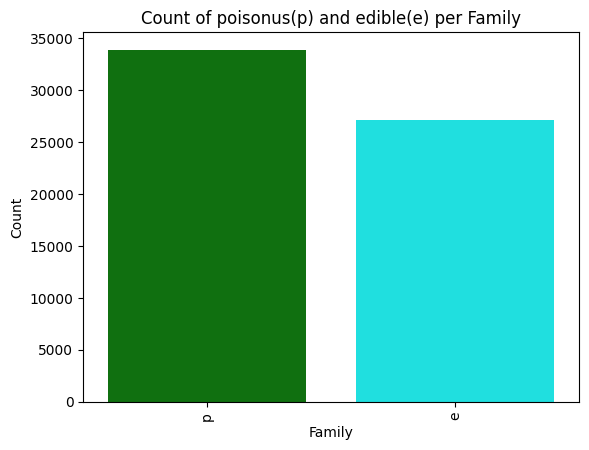

In [18]:
class_colors = {'p': 'green', 'e': 'cyan'}
sns.barplot(data=poison_vs_edible, x='class', y='count', palette=class_colors)

plt.xlabel('Family')
plt.ylabel('Count')
plt.title('Count of poisonus(p) and edible(e) per Family')
plt.xticks(rotation=90)


plot 2 pie chart seasonal

In [19]:
#secondary_data["season"] = secondary_data['season'].values.tolist()
#secondary_data

In [20]:
fungy_by_season = secondary_data.groupby('season')['class'].value_counts().reset_index(name='count')
fungy_by_season = fungy_by_season.pivot(index='season', columns='class', values='count')
fungy_by_season

class,e,p
season,,
a,12785,17392
s,1553,1174
u,9647,13251
w,3196,2071


<Figure size 800x600 with 0 Axes>

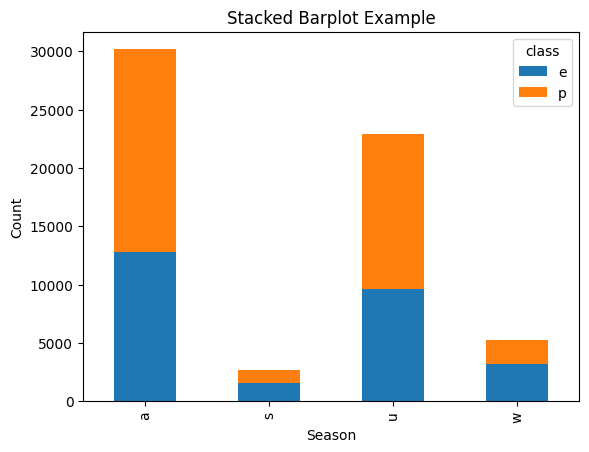

In [21]:
plt.figure(figsize=(8, 6))
fungy_by_season.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Season')
plt.ylabel('Count')
plt.title('Stacked Barplot Example')

# Display the plot
plt.show()

box plot de las medidas del "casco"



In [22]:
cap_diameter = secondary_data[["cap-diameter", "class"]]
cap_diameter

,cap-diameter,class
0,15.26,p
1,16.60,p
2,14.07,p
3,14.17,p
4,14.64,p
...,...,...
61064,1.18,p
61065,1.27,p
61066,1.27,p
61067,1.24,p


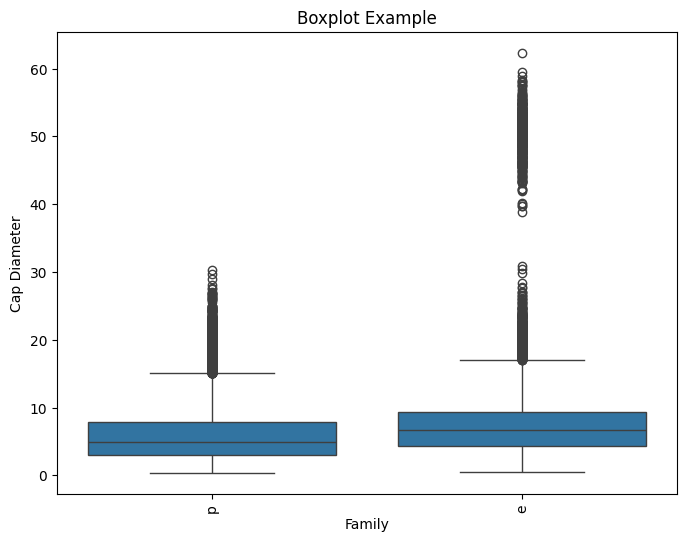

In [23]:
# Create the boxplot
plt.figure(figsize=(8, 6))

sns.boxplot(x='class', y='cap-diameter', data=cap_diameter)

# Add labels and title
plt.xlabel('Family')
plt.ylabel('Cap Diameter')
plt.title('Boxplot Example')
plt.xticks(rotation=90)
# Display the plot
plt.show()

insights interesantes , el diametro es importante para saber si es venenoso , y los bracket son todo venenosos

violin de cada variable que tanto aparece



In [24]:
stemdf = secondary_data.explode("stem-height")[[ "stem-height", "class"]]
stemdf['stem-height'] = stemdf['stem-height'].astype(float)
stemdf


,stem-height,class
0,16.95,p
1,17.99,p
2,17.80,p
3,15.77,p
4,16.53,p
...,...,...
61064,3.93,p
61065,3.18,p
61066,3.86,p
61067,3.56,p


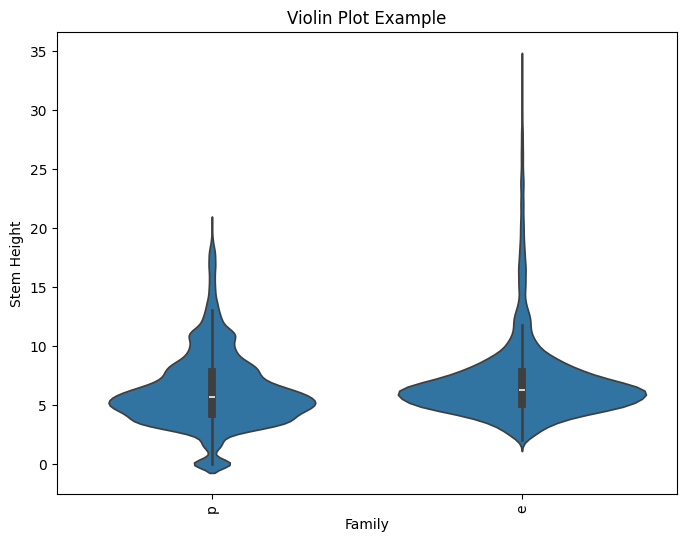

In [25]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='class', y='stem-height', data=stemdf)


plt.xlabel('Family')
plt.ylabel('Stem Height')
plt.title('Violin Plot Example')
plt.xticks(rotation=90)


plt.show()

heatmap de correlation de variables

In [27]:
#df_encoded = pd.get_dummies(secondary_data)
#correlation_matrix = secondary_data.corr(method='spearman')
#correlation

# Convert non-numeric columns to numeric using label encoding

from sklearn.preprocessing import LabelEncoder, MinMaxScaler


label_encoder = LabelEncoder()
df_encoded = secondary_data.copy()
for column in df_encoded.columns:
    if df_encoded[column].dtype == object:
        df_encoded[column] = label_encoder.fit_transform(df_encoded[column])

# Compute correlation matrix
correlation_matrix = df_encoded.corr()
scaler = MinMaxScaler()
correlation_matrix = scaler.fit_transform(correlation_matrix.abs())

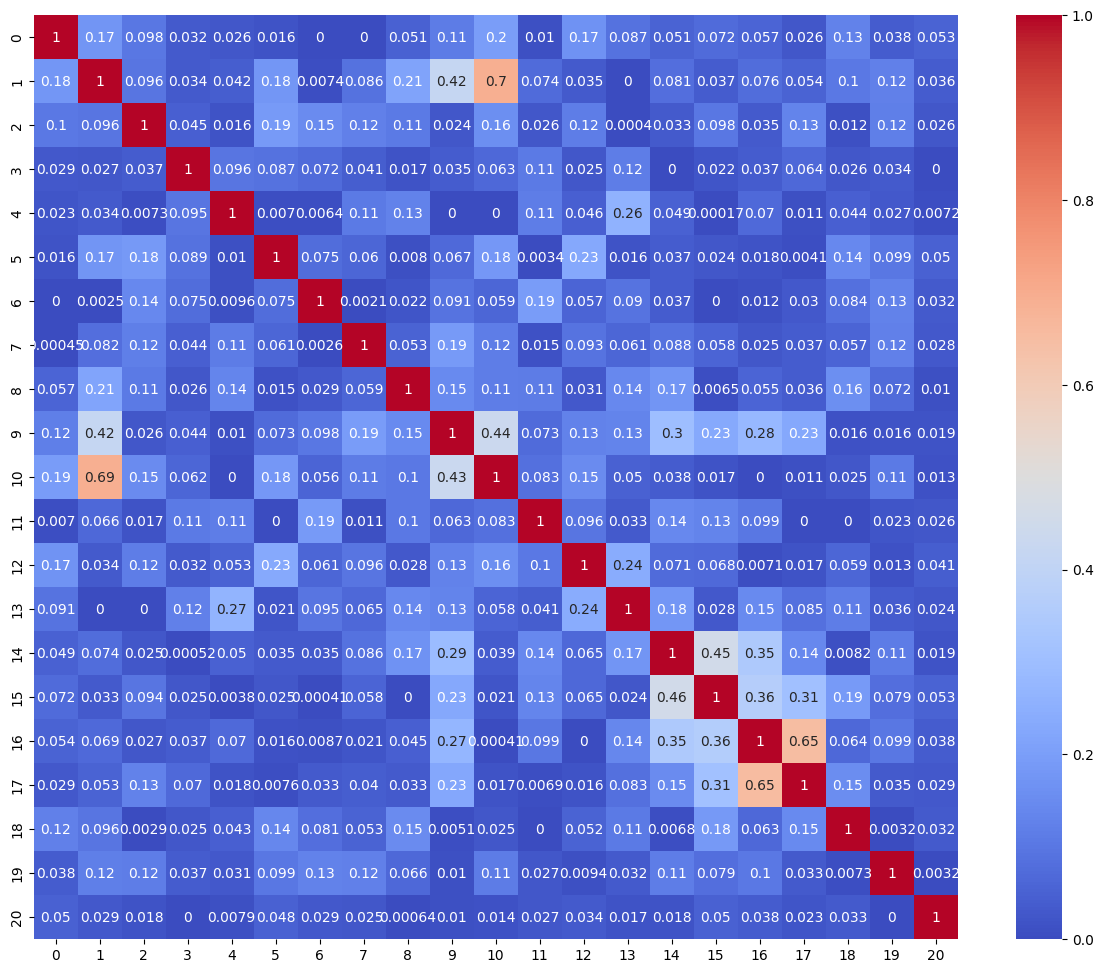

In [28]:
# Create heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)

# Display the heatmap
plt.show()

2) prepearing model

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
!pip install category_encoders
import category_encoders as ce

   ---------------------------------------- 0.0/81.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/81.9 kB ? eta -:--:--
   ----- ---------------------------------- 10.2/81.9 kB ? eta -:--:--
   -------------------- ------------------- 41.0/81.9 kB 991.0 kB/s eta 0:00:01
   ------------------------------ --------- 61.4/81.9 kB 812.7 kB/s eta 0:00:01
   ---------------------------------------- 81.9/81.9 kB 651.1 kB/s eta 0:00:00
   ---------------------------------------- 0.0/233.9 kB ? eta -:--:--
   ------- -------------------------------- 41.0/233.9 kB 2.0 MB/s eta 0:00:01
   ----------- --------------------------- 71.7/233.9 kB 991.0 kB/s eta 0:00:01
   ------------------ ------------------- 112.6/233.9 kB 819.2 kB/s eta 0:00:01
   ------------------- ------------------ 122.9/233.9 kB 722.1 kB/s eta 0:00:01
   ----------------------- -------------- 143.4/233.9 kB 711.9 kB/s eta 0:00:01
   ------------------------------- ------ 194.6/233.9 kB 695.5 kB/s eta 0:00:01

In [30]:
secondary_data

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,p,1.18,s,s,y,f,f,f,f,3.93,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61065,p,1.27,f,s,y,f,f,f,f,3.18,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61066,p,1.27,s,s,y,f,f,f,f,3.86,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u
61067,p,1.24,f,s,y,f,f,f,f,3.56,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u


In [31]:
#before separating the model i will make some feature engineering to see what is the best way to encode the values for the logistic regresion, first of all i will see OHE
OHE = pd.get_dummies(secondary_data)
OHE
# this multiplies the dataframe space by roughly 6 , this would not be goood for some df , i will try to make a better encoding


,cap-diameter,stem-height,stem-width,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_o,cap-shape_p,...,habitat_h,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,season_a,season_s,season_u,season_w
0,15.26,16.95,17.09,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,16.60,17.99,18.19,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,14.07,17.80,17.74,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,14.17,15.77,15.98,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
4,14.64,16.53,17.20,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,1.18,3.93,6.22,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
61065,1.27,3.18,5.43,False,True,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
61066,1.27,3.86,6.37,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
61067,1.24,3.56,5.44,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False


In [32]:
# binary encoding  better results and memmory usage
BE = ce.BinaryEncoder(cols=secondary_data.select_dtypes(include=['object']).columns)
BE_secondary_data = BE.fit_transform(secondary_data)
BE_secondary_data

,class_0,class_1,cap-diameter,cap-shape_0,cap-shape_1,cap-shape_2,cap-surface_0,cap-surface_1,cap-surface_2,cap-surface_3,...,spore-print-color_1,spore-print-color_2,spore-print-color_3,habitat_0,habitat_1,habitat_2,habitat_3,season_0,season_1,season_2
0,0,1,15.26,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
1,0,1,16.60,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
2,0,1,14.07,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
3,0,1,14.17,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
4,0,1,14.64,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,0,1,1.18,1,1,0,0,1,1,0,...,0,0,0,0,0,0,1,0,1,1
61065,0,1,1.27,0,1,0,0,1,1,0,...,0,0,0,0,0,0,1,0,1,1
61066,0,1,1.27,1,1,0,0,1,1,0,...,0,0,0,0,0,0,1,0,1,0
61067,0,1,1.24,0,1,0,0,1,1,0,...,0,0,0,0,0,0,1,0,1,0


In [33]:
x = secondary_data.drop("class", axis = 1)
y = secondary_data["class"]

X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.1, shuffle = True, random_state = 7)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.11, random_state= 7)

In [34]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 48916 entries, 464 to 53423
Series name: class
Non-Null Count  Dtype 
--------------  ----- 
48916 non-null  object
dtypes: object(1)
memory usage: 764.3+ KB


In [35]:
OHE = ce.OneHotEncoder()
OHE_x_train = OHE.fit_transform(X_train)
OHE_x_validation = OHE.transform(X_val)
OHE_x_test = OHE.transform(X_test)
OHE_x_train

,cap-diameter,cap-shape_1,cap-shape_2,cap-shape_3,cap-shape_4,cap-shape_5,cap-shape_6,cap-shape_7,cap-surface_1,cap-surface_2,...,habitat_3,habitat_4,habitat_5,habitat_6,habitat_7,habitat_8,season_1,season_2,season_3,season_4
464,7.24,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
22760,8.21,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
56248,4.57,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
21838,8.21,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
753,11.09,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46652,3.38,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
32977,2.00,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
40672,4.26,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
21435,4.22,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [36]:
BE = ce.BinaryEncoder()
BE_x_train = BE.fit_transform(X_train)
BE_x_validation= BE.transform(X_val)
BE_x_test = BE.transform(X_test)
BE_x_train

,cap-diameter,cap-shape_0,cap-shape_1,cap-shape_2,cap-surface_0,cap-surface_1,cap-surface_2,cap-surface_3,cap-color_0,cap-color_1,...,spore-print-color_1,spore-print-color_2,spore-print-color_3,habitat_0,habitat_1,habitat_2,habitat_3,season_0,season_1,season_2
464,7.24,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
22760,8.21,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
56248,4.57,0,1,0,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,1,1
21838,8.21,0,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
753,11.09,1,0,0,1,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46652,3.38,0,0,1,0,1,1,1,0,0,...,0,1,1,0,0,0,1,0,0,1
32977,2.00,0,0,1,1,0,1,0,1,0,...,0,0,1,0,0,1,1,0,1,0
40672,4.26,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
21435,4.22,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,1


In [ ]:
3) baseline

In [37]:
log_reg = LogisticRegression()
log_reg.fit(BE_x_train, y_train)

c:\Users\Francisco\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
accuracy = log_reg.score(BE_x_validation, y_val)

In [39]:
#FROM THIS I GET THAT THE MODEL HAS AN 80% accuracy
accuracy

0.8049950380416805

¿Cuál es el mejor score de validación obtenido? (¿Cómo conviene obtener el dataset para validar?)
Al predecir con este modelo para test, ¿Cúal es el score obtenido? (guardar el csv con predicciones para entregarlo después)
¿Qué features son los más importantes para predecir con el mejor modelo? Graficar.

In [40]:
BE_x_train.head()

,cap-diameter,cap-shape_0,cap-shape_1,cap-shape_2,cap-surface_0,cap-surface_1,cap-surface_2,cap-surface_3,cap-color_0,cap-color_1,...,spore-print-color_1,spore-print-color_2,spore-print-color_3,habitat_0,habitat_1,habitat_2,habitat_3,season_0,season_1,season_2
464,7.24,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
22760,8.21,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
56248,4.57,0,1,0,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,1,1
21838,8.21,0,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
753,11.09,1,0,0,1,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1


In [41]:
X_val.head()

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
10878,1.52,b,NaN,g,f,a,NaN,g,4.96,1.82,NaN,s,g,NaN,NaN,f,f,NaN,d,a
28769,8.46,s,d,e,t,d,c,y,5.83,9.32,NaN,NaN,e,NaN,NaN,f,f,NaN,d,a
20400,8.69,x,d,o,f,d,d,b,6.71,12.99,NaN,NaN,w,NaN,NaN,f,f,NaN,m,w
133,15.03,f,h,e,f,e,NaN,w,18.81,18.36,s,y,w,u,w,t,p,NaN,d,w
29927,3.81,s,d,n,t,d,c,p,4.17,5.74,NaN,NaN,n,NaN,NaN,f,f,NaN,d,u


In [42]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48916 entries, 464 to 53423
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cap-diameter          48916 non-null  float64
 1   cap-shape             48916 non-null  object 
 2   cap-surface           37639 non-null  object 
 3   cap-color             48916 non-null  object 
 4   does-bruise-or-bleed  48916 non-null  object 
 5   gill-attachment       41018 non-null  object 
 6   gill-spacing          28838 non-null  object 
 7   gill-color            48916 non-null  object 
 8   stem-height           48916 non-null  float64
 9   stem-width            48916 non-null  float64
 10  stem-root             7635 non-null   object 
 11  stem-surface          18336 non-null  object 
 12  stem-color            48916 non-null  object 
 13  veil-type             2549 non-null   object 
 14  veil-color            5943 non-null   object 
 15  has-ring              

In [ ]:
4) model

In [44]:
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn import tree
from category_encoders import TargetEncoder

x_train_filled = X_train.fillna("missing")
x_validation_filled = X_val.fillna("missing")

encoder = TargetEncoder(cols=['cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-color',
                              'stem-root', 'stem-surface', 'stem-color', 'veil-type', 'veil-color', 'has-ring', 'ring-type',
                              'spore-print-color', 'habitat', "season", "gill-spacing"])#,handle_missing='return_nan')
label_encoder = LabelEncoder()
LABEL_y_train = label_encoder.fit_transform(y_train)
LABEL_y_validation  = label_encoder.fit_transform(y_val)

MEAN_X_train = encoder.fit_transform(X_train, LABEL_y_train)
MEAN_X_validation = encoder.transform(X_val)

In [45]:
MEAN_X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48916 entries, 464 to 53423
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cap-diameter          48916 non-null  float64
 1   cap-shape             48916 non-null  float64
 2   cap-surface           48916 non-null  float64
 3   cap-color             48916 non-null  float64
 4   does-bruise-or-bleed  48916 non-null  float64
 5   gill-attachment       48916 non-null  float64
 6   gill-spacing          48916 non-null  float64
 7   gill-color            48916 non-null  float64
 8   stem-height           48916 non-null  float64
 9   stem-width            48916 non-null  float64
 10  stem-root             48916 non-null  float64
 11  stem-surface          48916 non-null  float64
 12  stem-color            48916 non-null  float64
 13  veil-type             48916 non-null  float64
 14  veil-color            48916 non-null  float64
 15  has-ring              

In [46]:
from sklearn.metrics import roc_auc_score
RF_model = RandomForestRegressor(random_state = 1)
RF_model.fit(MEAN_X_train, LABEL_y_train)
predictions = RF_model.predict(MEAN_X_validation)
auc_roc = roc_auc_score(LABEL_y_validation, predictions)
print("AUC-ROC score:", auc_roc)
RMSE = np.sqrt(mean_squared_error(LABEL_y_validation, predictions))
print("RMSE: %F" %(RMSE))

AUC-ROC score: 1.0
RMSE: 0.018924
